In [1]:
#!pip install -U scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
#import pandas.core.common import flatten

Number of robot steps:  100 
Lenght of columns for steps (x,y,theta):  300 
Total number of samples:  1000
Fitting 30 folds for each of 10 candidates, totalling 300 fits
Results for  accuracy
Best: 0.978095 using {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_depth': 18, 'criterion': 'gini'}
0.976349 (0.011566) with: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 80, 'max_depth': 14, 'criterion': 'gini'}
0.970476 (0.011161) with: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 80, 'max_depth': 18, 'criterion': 'entropy'}
0.977619 (0.011544) with: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_leaf_nodes': 40, 'max_depth': 9, 'criterion': 'gini'}
0.978095 (0.011638) with: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_depth': 18, 'criterion': 'gini'}
0.977778 (0.011291) with: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 80, 'max_depth': 18, 'criterion': 'gini'}
0.97492

<Figure size 720x1080 with 0 Axes>

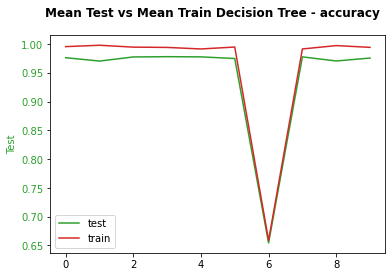

Fitting 30 folds for each of 10 candidates, totalling 300 fits
Results for  neg_log_loss
Best: -0.432029 using {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_depth': 3, 'criterion': 'entropy'}
-0.432029 (0.083685) with: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_depth': 3, 'criterion': 'entropy'}
-0.899888 (0.375417) with: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_leaf_nodes': 40, 'max_depth': 16, 'criterion': 'entropy'}
-0.899888 (0.375417) with: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_leaf_nodes': 60, 'max_depth': 13, 'criterion': 'entropy'}
-0.570995 (0.080629) with: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 2, 'criterion': 'entropy'}
-0.636170 (0.344943) with: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 19, 'criterion': 'gini'}
-0.459428 (0.293057) with: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_leaf_nodes':

<Figure size 720x1080 with 0 Axes>

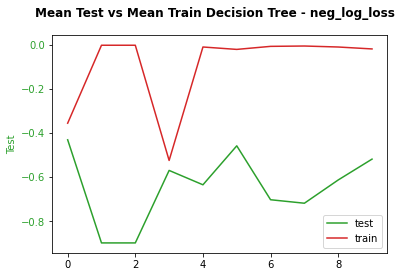

In [3]:
no_of_robot_steps = 100

fixed_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_xs.csv", delimiter=',')
fixed_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_ys.csv", delimiter=',')
fixed_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_thetas.csv", delimiter=',')

omni_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_xs.csv", delimiter=',')
omni_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_ys.csv", delimiter=',')
omni_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_thetas.csv", delimiter=',')

two_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_xs.csv", delimiter=',')
two_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_ys.csv", delimiter=',')
two_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_thetas.csv", delimiter=',')


len_of_steps = len(fixed_wheel_x[0])
total_len_of_columns = len_of_steps * 3
total_pose_size = len(fixed_wheel_x.flatten()) + len(fixed_wheel_y.flatten()) + len(fixed_wheel_theta.flatten())
total_pose_size = int(total_pose_size/total_len_of_columns)

print("Number of robot steps: ", len_of_steps, "\nLenght of columns for steps (x,y,theta): ",total_len_of_columns, "\nTotal number of samples: ", total_pose_size)

fixed_wheel_poses = np.column_stack((fixed_wheel_x.flatten(),fixed_wheel_y.flatten(),fixed_wheel_theta.flatten()))
fixed_wheel_poses = np.reshape(fixed_wheel_poses,(total_pose_size,total_len_of_columns))


omni_wheel_poses = np.column_stack((omni_wheel_x.flatten(),omni_wheel_y.flatten(),omni_wheel_theta.flatten()))
omni_wheel_poses = np.reshape(omni_wheel_poses,(total_pose_size,total_len_of_columns))

two_fixed_wheel_poses = np.column_stack((two_wheel_x.flatten(),two_wheel_y.flatten(),two_wheel_theta.flatten()))
two_fixed_wheel_poses = np.reshape(two_fixed_wheel_poses,(total_pose_size,total_len_of_columns))

x_headings = ["step x " + str(i+1) for i in range(int(total_len_of_columns/3))]
y_headings = ["step y " + str(i+1) for i in range(int(total_len_of_columns/3))]
theta_headings = ["step theta " + str(i+1) for i in range(int(total_len_of_columns/3))]

headings = []
for i in range(0,len(x_headings)):
    headings.append(x_headings[i])
    headings.append(y_headings[i])
    headings.append(theta_headings[i])
#headings = x_headings + y_headings + theta_headings
#headings

fixed_p = pd.DataFrame(fixed_wheel_poses, columns = headings)
omni_p = pd.DataFrame(omni_wheel_poses, columns = headings)
two_fixed_p = pd.DataFrame(two_fixed_wheel_poses, columns = headings)

#Add class labels
fixed_p.insert(0,'Model type', 'fw')
omni_p.insert(0,'Model type', 'ow')
two_fixed_p.insert(0,'Model type', 'tf')

wheel_poses = pd.concat([fixed_p, omni_p, two_fixed_p])

wheel_poses = wheel_poses.iloc[np.random.RandomState(seed=16).permutation(len(wheel_poses))]
wheel_poses = wheel_poses.reset_index(drop=True)


#wheel_poses['Model type'] = wheel_poses['Model type'].replace('fw',0)
#wheel_poses['Model type'] = wheel_poses['Model type'].replace('ow',1)
#wheel_poses['Model type'] = wheel_poses['Model type'].replace('tf',1)

#wheel_poses['Model type'].value_counts().plot(kind='bar')
onehot_encoder = OneHotEncoder(sparse=False)
#wheel_poses.describe()
#Splitting the variables into X & y
#print(type(wheel_poses['Model type']))
#y = onehot_encoder.fit_transform(wheel_poses['Model type'].values.reshape(-1,1))
#print("Y is: ", y)
#kk
X = wheel_poses.drop(columns='Model type')
y = wheel_poses['Model type']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=16)
#trprint(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state=16)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=16)



#reg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs')
reg_decisiontree = DecisionTreeClassifier(random_state=16)
reg_decisiontree.fit(X_train, y_train)
y_pred = reg_decisiontree.predict(X_valid)
# 'roc_auc', 'recall', 'precision', 'f1'
#scorings = ['accuracy', 'neg_log_loss', 'roc_auc', 'recall', 'precision', 'f1']
scorings = ['accuracy', 'neg_log_loss']
params_grid = {
    'criterion':['gini','entropy'],
    'max_leaf_nodes':[20,40,60,80,100],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[2,3,4],
    'max_depth':range(1,20)
    }

for scoring in scorings:
    
    grid = params_grid
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    random_search = RandomizedSearchCV(estimator=reg_decisiontree, param_distributions=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0, verbose = 4, return_train_score=True)
    random_result = random_search.fit(X_train, y_train)
    # summarize results
    print("Results for ", scoring)
    print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
    means_test = random_result.cv_results_['mean_test_score']
    stds_test = random_result.cv_results_['std_test_score']
    means_train = random_result.cv_results_['mean_train_score']
    stds_train = random_result.cv_results_['std_train_score']    
    params = random_result.cv_results_['params']
    
    for mean, stdev, param in zip(means_test, stds_test, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    means_test = random_result.cv_results_['mean_test_score']
    means_train = random_result.cv_results_['mean_train_score']
    
    #plt.plot(means_test, label = 'test')
    #plt.plot(means_train, label = 'train')
    #plt.legend(loc='best')
    #plt.show()
    
    plt.figure(figsize=(10,15))
    fig, ax1 = plt.subplots()
    
    
    color1 = 'tab:green'
    color2 = 'tab:red'
    ax1.set_ylabel('Test', color = color1)
    ax1.plot(means_test, color = color1, label = 'test')
    ax1.plot(means_train, color = color2, label = 'train')
    ax1.tick_params(axis ='y', labelcolor = color1)
    
    
    fig.suptitle('Mean Test vs Mean Train Decision Tree - ' + str(scoring), fontweight ="bold")
    plt.legend(loc='best')
    plt.show()

    






C:\Users\ayoid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.3111111111111111
Log Loss:  0.6888888888888889


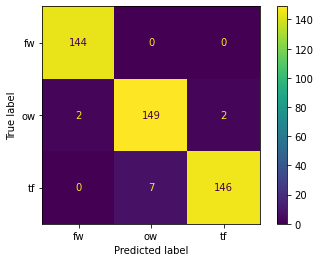

In [4]:
confusion_matrix = metrics.plot_confusion_matrix(reg_decisiontree, X_test, y_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Log Loss: ", metrics.zero_one_loss(y_test, y_pred))
print(confusion_matrix)


C:\Users\ayoid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9533333333333334
Log Loss:  0.046666666666666634


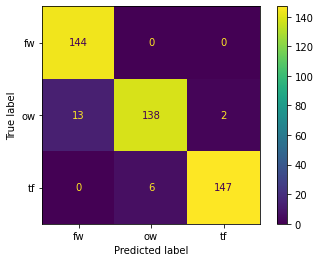

In [5]:
#Best: -0.249569 using {'min_samples_split': 3, 'min_samples_leaf': 3, 
#'max_leaf_nodes': 80, 'max_depth': 5, 'criterion': 'gini'}
reg_best_log = DecisionTreeClassifier(min_samples_split= 3, min_samples_leaf= 3, max_leaf_nodes=80, max_depth=5, criterion= 'gini')
reg_best_log.fit(X_train, y_train)
y_pred_best_log = reg_best_log.predict(X_test)
confusion_matrix_best_log = metrics.plot_confusion_matrix(reg_best_log, X_test, y_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_best_log))
print("Log Loss: ", metrics.zero_one_loss(y_test, y_pred_best_log))
print(confusion_matrix_best_log)



<Figure size 720x1080 with 0 Axes>

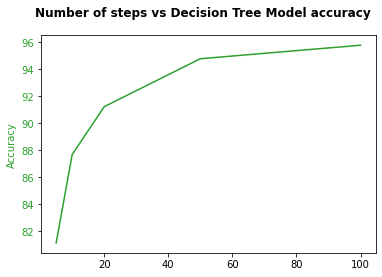

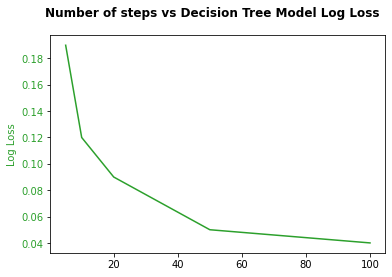

In [6]:
#And we run the number of steps with our best model to see how the number of steps relates with the 
#models performance. 
def get_step_results(no_of_robot_steps):
    fixed_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_xs.csv", delimiter=',')
    fixed_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_ys.csv", delimiter=',')
    fixed_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_fixed_thetas.csv", delimiter=',')

    omni_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_xs.csv", delimiter=',')
    omni_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_ys.csv", delimiter=',')
    omni_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_omni_thetas.csv", delimiter=',')

    two_wheel_x = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_xs.csv", delimiter=',')
    two_wheel_y = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_ys.csv", delimiter=',')
    two_wheel_theta = np.loadtxt(str(no_of_robot_steps) + "_steps_two_fixed_thetas.csv", delimiter=',')

    #Get parameters of the dataframe we will need to build
    len_of_steps = len(fixed_wheel_x[0])
    total_len_of_columns = len_of_steps * 3
    total_pose_size = len(fixed_wheel_x.flatten()) + len(fixed_wheel_y.flatten()) + len(fixed_wheel_theta.flatten())
    total_pose_size = int(total_pose_size/total_len_of_columns)

    #print("Number of robot steps: ", len_of_steps, "\nLenght of columns for steps (x,y,theta): ",total_len_of_columns, "\nTotal number of samples: ", total_pose_size)

    #Expose and reshape the measurements in the respective wheels 
    #to build a dataframe for the wheeltype
    fixed_wheel_poses = np.column_stack((fixed_wheel_x.flatten(),fixed_wheel_y.flatten(),fixed_wheel_theta.flatten()))
    fixed_wheel_poses = np.reshape(fixed_wheel_poses,(total_pose_size,total_len_of_columns))

    omni_wheel_poses = np.column_stack((omni_wheel_x.flatten(),omni_wheel_y.flatten(),omni_wheel_theta.flatten()))
    omni_wheel_poses = np.reshape(omni_wheel_poses,(total_pose_size,total_len_of_columns))
    
    two_fixed_wheel_poses = np.column_stack((two_wheel_x.flatten(),two_wheel_y.flatten(),two_wheel_theta.flatten()))
    two_fixed_wheel_poses = np.reshape(two_fixed_wheel_poses,(total_pose_size,total_len_of_columns))

    #Creating the column names. Each measurement contains a X,y and theta value
    x_headings = ["step x " + str(i+1) for i in range(int(total_len_of_columns/3))]
    y_headings = ["step y " + str(i+1) for i in range(int(total_len_of_columns/3))]
    theta_headings = ["step theta " + str(i+1) for i in range(int(total_len_of_columns/3))]
    headings = []
    for i in range(0,len(x_headings)):
        headings.append(x_headings[i])
        headings.append(y_headings[i])
        headings.append(theta_headings[i])
    #headings = x_headings + y_headings + theta_headings
    #headings

    #Creating the respective wheel dataframes
    fixed_p = pd.DataFrame(fixed_wheel_poses, columns = headings)
    omni_p = pd.DataFrame(omni_wheel_poses, columns = headings)
    two_fixed_p = pd.DataFrame(two_fixed_wheel_poses, columns = headings)

    #Tagging class labels in a new column with the wheel type 
    #and joining the dataframes into one, we shuffle the dataframe
    #and reset the index
    fixed_p.insert(0,'Model type', 'fw')
    omni_p.insert(0,'Model type', 'ow')
    two_fixed_p.insert(0,'Model type', 'tf')
    wheel_poses = pd.concat([fixed_p, omni_p, two_fixed_p])
    wheel_poses = wheel_poses.iloc[np.random.RandomState(seed=16).permutation(len(wheel_poses))]
    wheel_poses = wheel_poses.reset_index(drop=True)

    X = wheel_poses.drop(columns='Model type')
    y = wheel_poses['Model type']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=16)
    #trprint(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    #X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.3, random_state=16)
    
    #X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state=16)
    
    
    ###
    
    #Best: -1.106958 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
    #reg_best_log = LogisticRegression(multi_class='multinomial', C=0.01, penalty='l2', solver='newton-cg')
    #reg_best_log.fit(X_train, y_train)

    #Using our best logger hyper parameters
    ###

    
    reg_best_log_steps = DecisionTreeClassifier(min_samples_split= 3, min_samples_leaf= 3, max_leaf_nodes=80, max_depth=5, criterion= 'gini')
    reg_best_log_steps.fit(X_train, y_train)
    y_pred_tuned_dt = reg_best_log_steps.predict(X_test)

    dic_acc = {}
    dic_zol = {}
    
    #confusion_matrix = metrics.plot_confusion_matrix(reg_best_log_steps, X_test, y_test)
    #print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_tuned_dt))
    #print(confusion_matrix)

    y_pred_prob = reg_best_log_steps.predict_proba(X_test)[:,1]


    dic_acc['ACC'] = round(metrics.accuracy_score(y_test, y_pred_tuned_dt)*100,2)
    dic_zol['Zero One Loss'] = round(metrics.zero_one_loss(y_test, y_pred_tuned_dt),2)
    
    model_name = str(len_of_steps) + '_steps_DT_robot_model_weights.sav' 
    pickle.dump(reg_best_log_steps, open(model_name, 'wb'))
    
    return dic_acc, dic_zol


steps = [5, 10, 20, 50, 100]
#steps = [100, 500, 1000, 2000, 5000,10000]

step_dic = {}
#Collects the accuracy and log loss for each step
#steps = [5]

for no_of_robot_steps in steps:
    step_acc, step_zol = get_step_results(no_of_robot_steps)
    step_dic[no_of_robot_steps] = [step_acc, step_zol]
    
k_list = []
v_list = []
z_list = []
for k, v in step_dic.items():
    k_list.append(k) 
    v_list.append(list(v[0].values())[0])
    z_list.append(list(v[1].values())[0])
    #print("For step: ", k, "the results are: ", v )

plt.figure(figsize=(10,15))
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_ylabel('Accuracy', color = color)
ax1.plot(k_list, v_list, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
fig.suptitle('Number of steps vs Decision Tree Model accuracy\n', fontweight ="bold")
plt.show()

fig2, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_ylabel('Log Loss', color = color)
ax1.plot(k_list, z_list, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
fig2.suptitle('Number of steps vs Decision Tree Model Log Loss\n', fontweight ="bold")
plt.show()

    


In [7]:
step_dic

{5: [{'ACC': 81.11}, {'Zero One Loss': 0.19}],
 10: [{'ACC': 87.67}, {'Zero One Loss': 0.12}],
 20: [{'ACC': 91.22}, {'Zero One Loss': 0.09}],
 50: [{'ACC': 94.78}, {'Zero One Loss': 0.05}],
 100: [{'ACC': 95.78}, {'Zero One Loss': 0.04}]}